SALES PRECTION MODEL USING LINEAR REGRESSION


In [1]:
#importing required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

#Data Visualization
import matplotlib.pyplot as plt



Reading Dataset


In [2]:
data = pd.DataFrame(pd.read_csv('Advertising.csv'))

Data Insecption

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#dropping or deletting umwanted row from datatset
del data['Unnamed: 0']

In [5]:
data.shape


(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [8]:
#Checking null values in the dataset
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [9]:
#Checking no of null values in columns
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Exploratory Data Analysis


Creating boxplot for every column

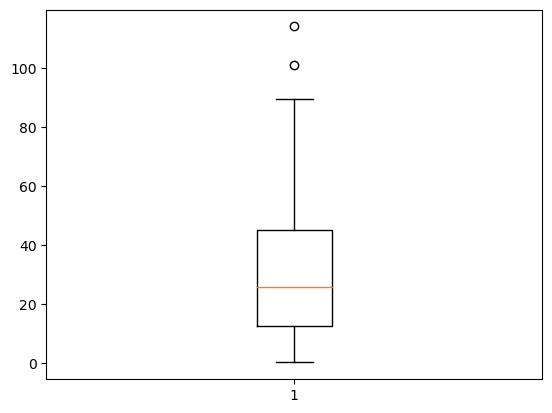

In [10]:
#boxplot for newspaper
plt1 = plt.boxplot(data['Newspaper'])

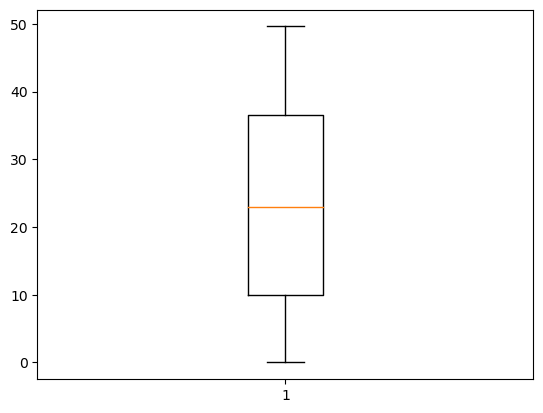

In [11]:
#boxplot of Radio column
plt2 = plt.boxplot(data['Radio'])

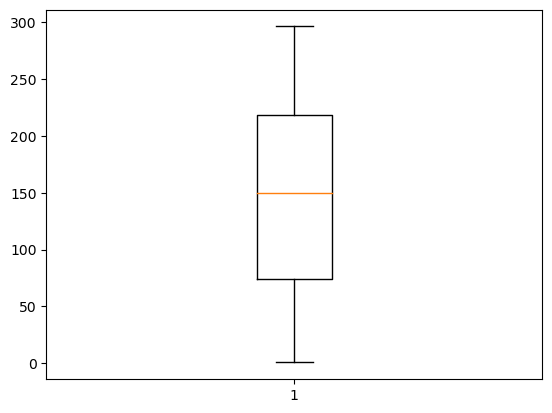

In [12]:
#boxplot of Tv column
plt3 = plt.boxplot(data['TV'])

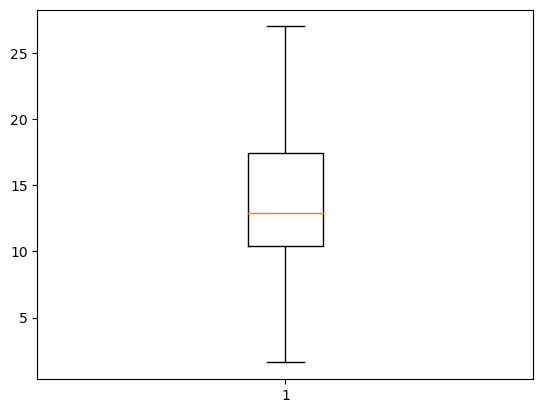

In [13]:
# boxplot of target variable, Sales column
plt4 = plt.boxplot(data['Sales'])

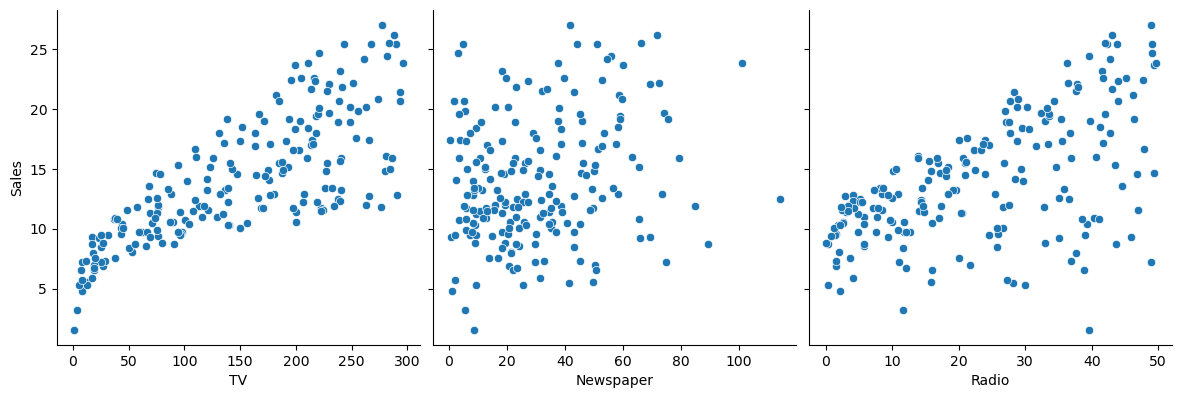

In [14]:
#How other variables are related with sales using scatter plot.
import seaborn as sn
fig1 = sn.pairplot(data , x_vars=['TV', 'Newspaper', 'Radio'] , y_vars = 'Sales' , height = 4 , aspect=1 ,
                   kind='scatter')


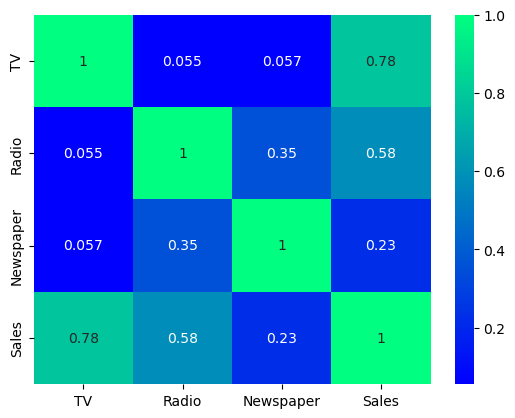

In [15]:
#Correlation between different Variables
fig2 = sn.heatmap(data.corr(), annot = True , cmap = 'winter')

MODEL BUILDING

In [16]:
#Building linear regression model 
#let us take tv , radio as input features and sales as target value
input_features = ['TV','Radio']
x = data[input_features]
y= data['Sales']

# Splitting data into train and test datasets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7,test_size=0.3)



In [17]:
x_train.head()

,TV,Radio
186,139.5,2.1
99,135.2,41.7
139,184.9,43.9
60,53.5,2.0
117,76.4,0.8


In [18]:
x_test.head()

,TV,Radio
21,237.4,5.1
95,163.3,31.6
102,280.2,10.1
12,23.8,35.1
33,265.6,20.0


In [19]:
#Linear Model
model = LinearRegression()
model = model.fit(x_train,y_train)


In [20]:
y_pred = model.predict(x_test)
print(y_pred)

[14.71628143 16.41095009 17.6133049  10.74713955 18.8402238  12.60438298
 14.6343471   9.54372828 17.29336935 13.87657857  8.5402706  10.51436742
  7.12783225 15.15889524 11.57323173  9.9287229  13.27859952 15.24862337
 16.41513778 11.41296651  5.36753181 21.77740339 18.08292126 19.31262812
 13.88169647 12.1814457  10.54149002 16.41292611 12.4883566  18.36130361
 10.0627975   3.63830068  4.52095471  9.17758407 14.25179716 11.67948741
 19.69424875 12.50895801 12.07542834 18.16752794 12.38419345 20.74892093
 17.37635304  6.60131608  8.23708761 10.57162559 20.38824501 11.09279442
 12.05773138 16.55549526 12.01501853 17.89483711 21.18698957 13.59271286
 23.29842114 20.51196287 15.36814999  7.57835369 20.62636804 11.83777041]


In [21]:
sales_set = x_test
x_test['y_test'] = y_test
x_test['y_pred'] = y_pred
print(x_test)

        TV  Radio  y_test     y_pred
21   237.4    5.1    12.5  14.716281
95   163.3   31.6    16.9  16.410950
102  280.2   10.1    14.8  17.613305
12    23.8   35.1     9.2  10.747140
33   265.6   20.0    17.4  18.840224
96   197.6    3.5    11.7  12.604383
81   239.8    4.1    12.3  14.634347
140   73.4   17.0    10.9   9.543728
11   214.7   24.0    17.4  17.293369
77   120.5   28.5    14.2  13.876579
132    8.4   27.2     5.7   8.540271
94   107.4   14.0    11.5  10.514367
107   90.4    0.3     8.7   7.127832
123  123.1   34.6    15.2  15.158895
136   25.6   39.0     9.5  11.573232
73   129.4    5.7    11.0   9.928723
63   102.7   29.6    14.0  13.278600
85   193.2   18.4    15.2  15.248623
40   202.5   22.3    16.6  16.415138
31   112.9   17.4    11.9  11.412967
155    4.1   11.6     3.2   5.367532
47   239.9   41.5    23.2  21.777403
105  137.9   46.4    19.2  18.082921
142  220.5   33.2    20.1  19.312628
112  175.7   15.4    14.1  13.881696
177  170.2    7.8    11.7  12.181446
1

In [22]:
res = y_pred -y_test
print(res)


21     2.216281
95    -0.489050
102    2.813305
12     1.547140
33     1.440224
96     0.904383
81     2.334347
140   -1.356272
11    -0.106631
77    -0.323421
132    2.840271
94    -0.985633
107   -1.572168
123   -0.041105
136    2.073232
73    -1.071277
63    -0.721400
85     0.048623
40    -0.184862
31    -0.487033
155    2.167532
47    -1.422597
105   -1.117079
142   -0.787372
112   -0.218304
177    0.481446
158    3.241490
113    0.512926
1      2.088357
150    2.261304
151   -1.537202
108   -1.661699
76    -2.379045
125   -1.422416
160   -0.148203
86    -0.320513
109   -0.105751
2      3.208958
75     3.375428
20     0.167528
148    1.484193
52    -1.851079
41     0.276353
22     1.001316
49    -1.462912
180    0.071626
54     0.188245
164   -0.807206
67    -1.342269
23     1.055495
116   -0.184981
169    2.894837
69    -1.113010
122    1.992713
17    -1.101579
39    -0.988037
97    -0.131850
34    -1.921646
0     -1.473632
6      0.037770
Name: Sales, dtype: float64


Checking RMSE

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Root Mean Square Error

In [24]:
np.square(mean_squared_error(y_test,y_pred))

5.556861259753335

Checking R-Squared on the model

In [25]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8970478043582674

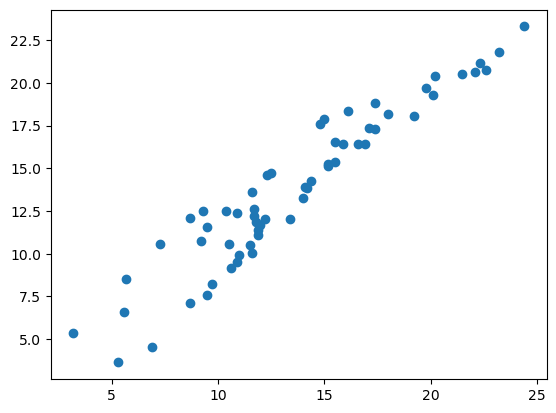

In [26]:
fig = plt.scatter(y_test,y_pred)

In [27]:
new_x = [[230.1,37.8]]
print(model.predict(new_x))


[20.62636804]


C:\Users\Premnath Bhalke\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
